<a href="https://colab.research.google.com/github/LillyMac12/ACGWEP/blob/main/An_Analysis_and_Comparison_of_Gravitational_Wave_Event_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An Analysis and Comparison of Gravitational Wave Event Parameters

### GW150914 and GW190412
---
This covers plotting the event, finding the power spectral density (PSD), the waveform modeling process, finding the signal to noise ratio (SNR), and plotting a spectrogram of the event.

Uses PyCBC (https://zenodo.org/records/10473621)

In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.strain.strain import lowpass
import matplotlib.pyplot as plt
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
import numpy
from pycbc.filter import sigma


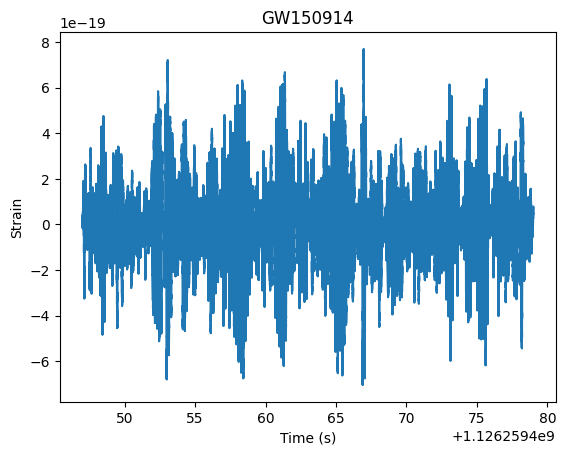

Text(0.5, 1.0, 'GW190412')

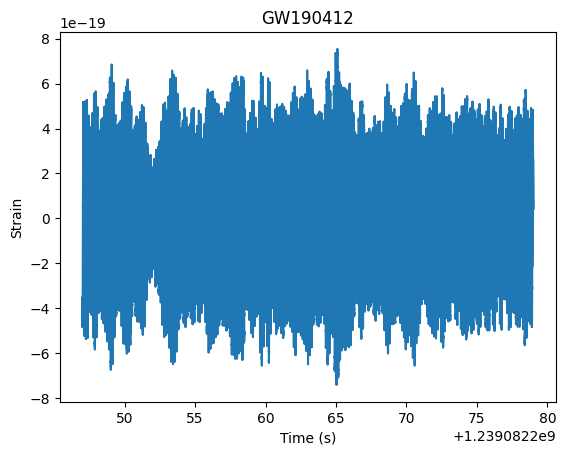

In [ ]:
#plot the strain data for each event

mergerGW150914 = Merger("GW150914")
mergerGW190412 = Merger("GW190412")

strainGW150914 = mergerGW150914.strain('H1')
strainGW190412 = mergerGW190412.strain('H1')

pylab.plot(strainGW150914.sample_times, strainGW150914)
pylab.xlabel('Time (s)')
pylab.ylabel("Strain")
pylab.title("GW150914")
pylab.show()
pylab.plot(strainGW190412.sample_times, strainGW190412)
pylab.xlabel('Time (s)')
pylab.ylabel("Strain")
pylab.title("GW190412")


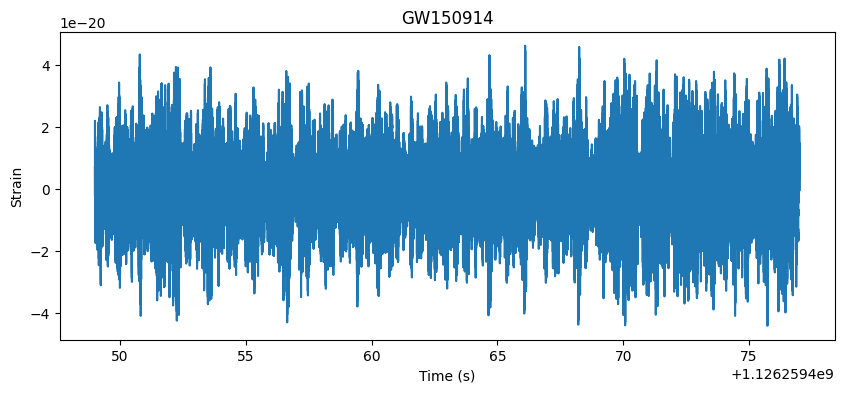

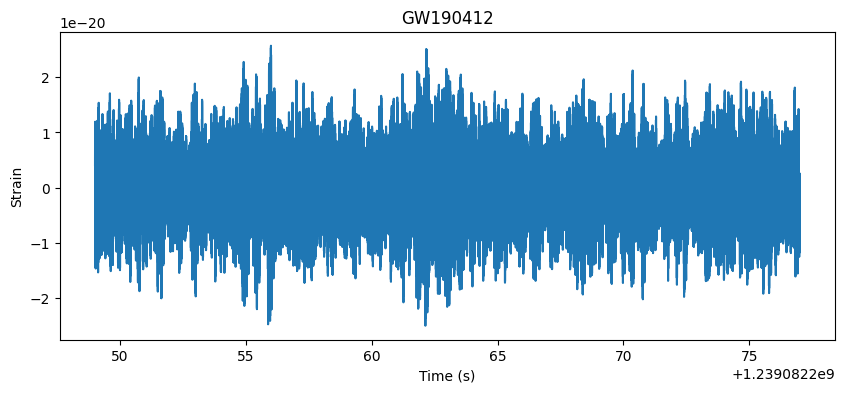

In [ ]:
strainGW150914 = mergerGW150914.strain('H1')
strainGW190412 = mergerGW190412.strain('H1')

hpGW150914 = highpass(strainGW150914, 15)
hpGW190412 = highpass(strainGW190412, 15)

strainGW150914 = resample_to_delta_t(hpGW150914, 1.0/2048)
strainGW190412 = resample_to_delta_t(hpGW190412, 1.0/2048)

strainGW150914 = strainGW150914.crop(2, 2)
strainGW190412 = strainGW190412.crop(2, 2)

pylab.figure(figsize=[10, 4])
pylab.plot(strainGW150914.sample_times, strainGW150914)
pylab.xlabel('Time (s)')
pylab.ylabel("Strain")
pylab.title("GW150914")
pylab.show()

pylab.figure(figsize=[10, 4])
pylab.plot(strainGW190412.sample_times, strainGW190412)
pylab.xlabel('Time (s)')
pylab.ylabel("Strain")
pylab.title("GW190412")
pylab.show()

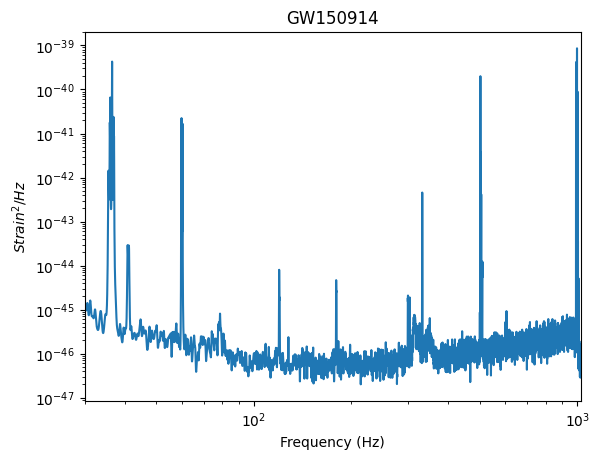

Text(0.5, 1.0, 'GW190412')

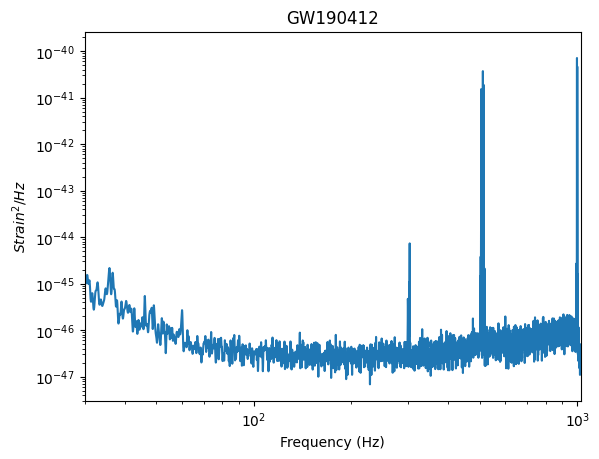

In [ ]:
psdGW150914 = strainGW150914.psd(4)
psdGW190412 = strainGW190412.psd(4)

psdGW150914 = interpolate(psdGW150914, strainGW150914.delta_f)
psdGW190412 = interpolate(psdGW190412, strainGW190412.delta_f)

psdGW150914 = inverse_spectrum_truncation(psdGW150914, int(4 * strainGW150914.sample_rate),
                                  low_frequency_cutoff=15)
psdGW190412 = inverse_spectrum_truncation(psdGW190412, int(4 * strainGW190412.sample_rate),
                                  low_frequency_cutoff=15)

pylab.loglog(psdGW150914.sample_frequencies, psdGW150914)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(30, 1024)
pylab.title("GW150914")
pylab.show()
pylab.loglog(psdGW190412.sample_frequencies, psdGW190412)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(30, 1024)
pylab.title("GW190412")

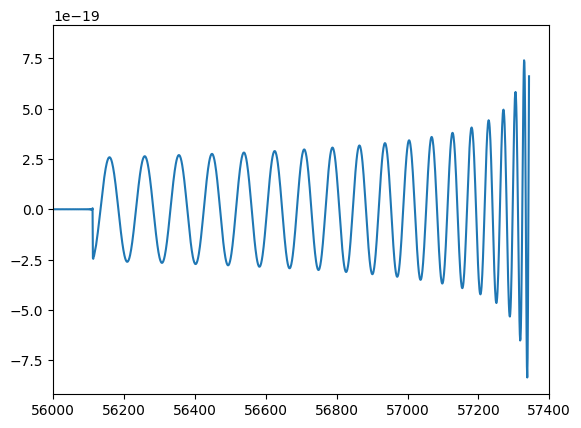

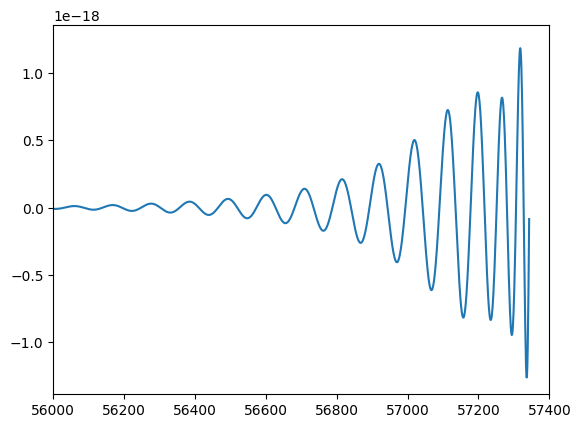

In [ ]:
m = 36  #solar masses
m2 = 36
waveformGW150914, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=strainGW150914.delta_t,
                     f_lower=20)

waveformGW190412, hc = get_td_waveform(approximant="IMRPhenomXHM",
                     mass1=m2,
                     mass2=3*m2,
                     delta_t=strainGW190412.delta_t,
                     f_lower=20)

waveformGW150914.resize(len(strainGW150914))
waveformGW190412.resize(len(strainGW190412))

templateGW150914 = waveformGW150914.cyclic_time_shift(waveformGW150914.start_time)
pylab.plot(templateGW150914)
pylab.xlim(56000,57400)
pylab.show()

templateGW190412 = waveformGW190412.cyclic_time_shift(waveformGW190412.start_time)
pylab.plot(templateGW190412)
pylab.xlim(56000,57400)
pylab.show()

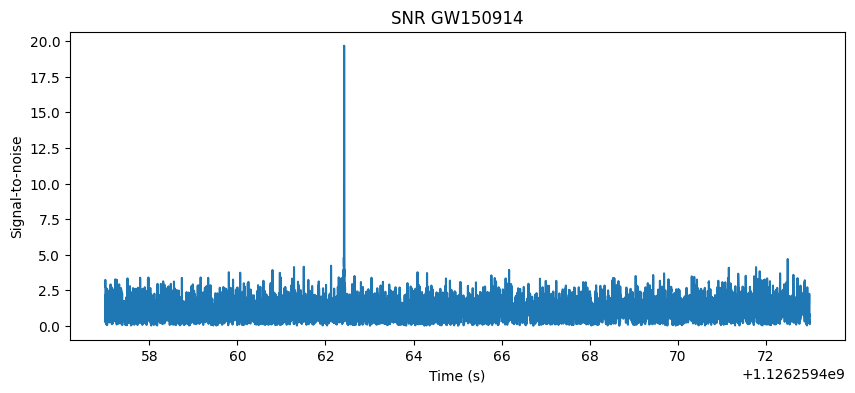

We found a signal at 1126259462.4248047s with SNR 19.677873025893273


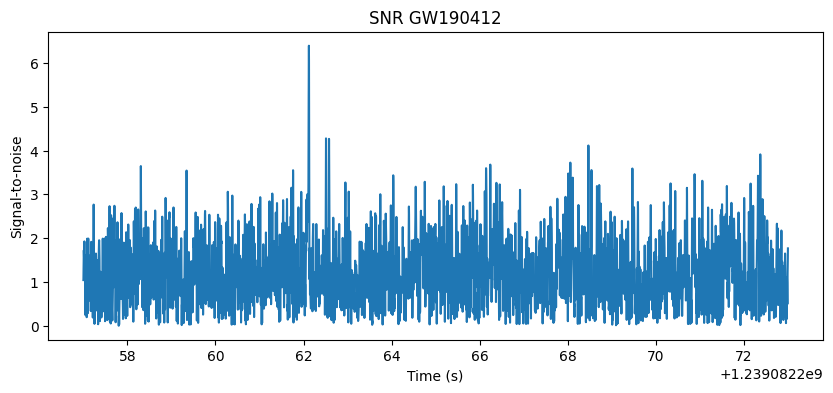

We found a signal at 1239082262.1210938s with SNR 6.392456057034665


In [ ]:
snrGW150914 = matched_filter(templateGW150914, strainGW150914,
                     psd=psdGW150914, low_frequency_cutoff=20)
snrGW190412 = matched_filter(templateGW190412, strainGW190412,
                     psd=psdGW190412, low_frequency_cutoff=20)

snrGW150914 = snrGW150914.crop(4 + 4, 4)
snrGW190412 = snrGW190412.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snrGW150914.sample_times, abs(snrGW150914))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.title("SNR GW150914")
pylab.show()

peak = abs(snrGW150914).numpy().argmax()
snrpGW150914 = snrGW150914[peak]
timeGW150914 = snrGW150914.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(timeGW150914,
                                                    abs(snrpGW150914)))

pylab.figure(figsize=[10, 4])
pylab.plot(snrGW190412.sample_times, abs(snrGW190412))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.title("SNR GW190412")
pylab.show()

peak = abs(snrGW190412).numpy().argmax()
snrpGW190412 = snrGW190412[peak]
timeGW190412 = snrGW190412.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(timeGW190412,
                                                    abs(snrpGW190412)))


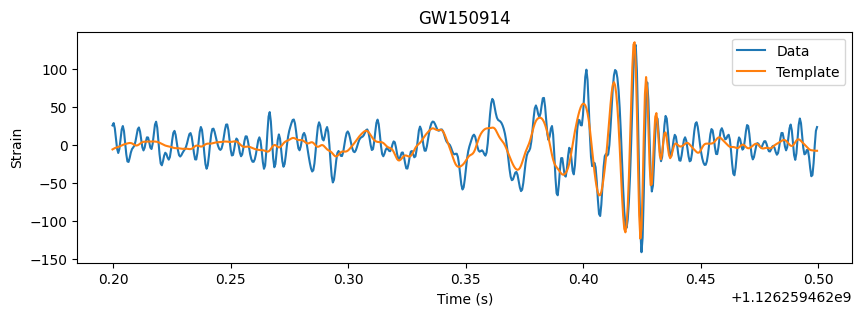

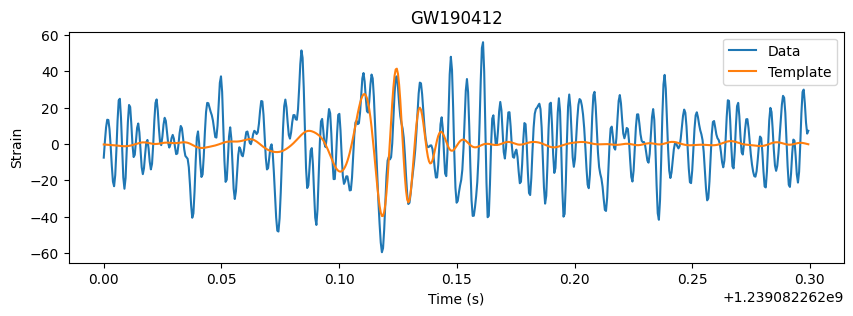

In [ ]:
dt = timeGW150914 - strainGW150914.start_time
alignedGW150914 = templateGW150914.cyclic_time_shift(dt)

alignedGW150914 /= sigma(alignedGW150914, psd=psdGW150914, low_frequency_cutoff=20.0)

alignedGW150914 = (alignedGW150914.to_frequencyseries() * snrpGW150914).to_timeseries()
alignedGW150914.start_time = strainGW150914.start_time


# We do it this way so that we can whiten both the template and the data
white_data = (strainGW150914.to_frequencyseries() / psdGW150914**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
tapered = alignedGW150914.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psdGW150914**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(mergerGW150914.time-.2, mergerGW150914.time+.1)
white_template = white_template.time_slice(mergerGW150914.time-.2, mergerGW150914.time+.1)

pylab.figure(figsize=[10, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.title("GW150914")
pylab.xlabel("Time (s)")
pylab.ylabel("Strain")
pylab.legend()
pylab.show()


dt = timeGW190412 - strainGW190412.start_time
aligned = templateGW190412.cyclic_time_shift(dt)

aligned /= sigma(aligned, psd=psdGW190412, low_frequency_cutoff=20.0)

aligned = (aligned.to_frequencyseries() * snrpGW190412).to_timeseries()
aligned.start_time = strainGW190412.start_time


# We do it this way so that we can whiten both the template and the data
white_data = (strainGW190412.to_frequencyseries() / psdGW190412**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
tapered = aligned.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psdGW190412**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(mergerGW190412.time-.2, mergerGW190412.time+.1)
white_template = white_template.time_slice(mergerGW190412.time-.2, mergerGW190412.time+.1)

pylab.figure(figsize=[10, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.xlabel("Time (s)")
pylab.ylabel("Strain")
pylab.title("GW190412")
pylab.legend()
pylab.show()

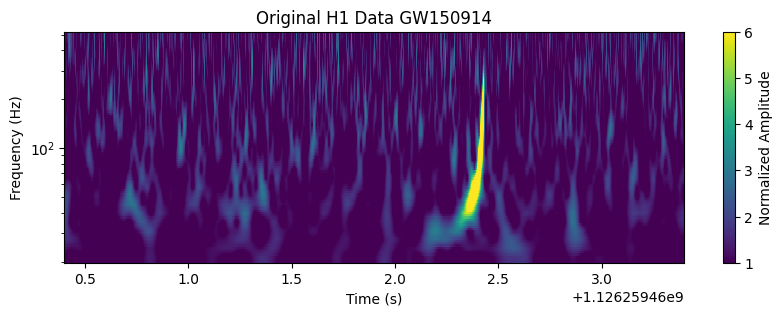

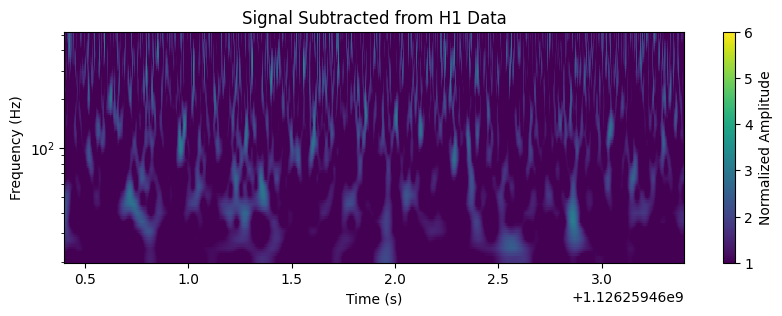

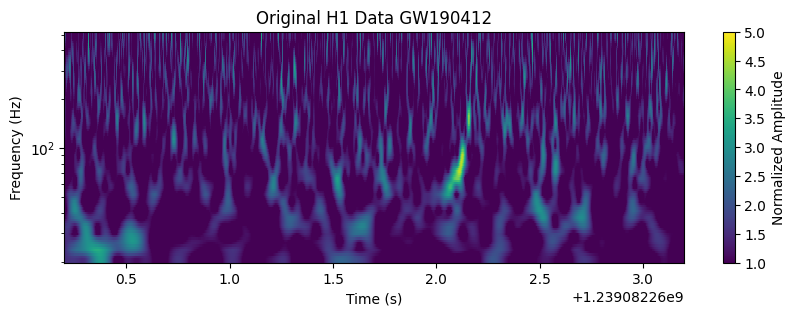

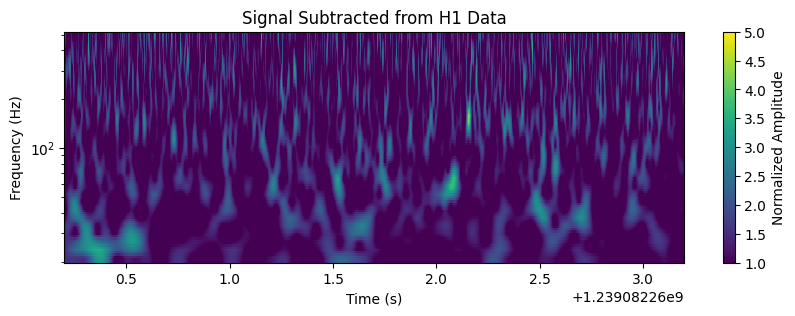

In [ ]:
subtracted = strainGW150914 - alignedGW150914

for data, title in [(strainGW150914, 'Original H1 Data GW150914'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[10, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.colorbar(label="Normalized Amplitude")
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(mergerGW150914.time - 2, mergerGW150914.time + 1)
    pylab.show()


subtracted = strainGW190412 - aligned

for data, title in [(strainGW190412, 'Original H1 Data GW190412'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 10),
                                                  frange=(20, 512))
    pylab.figure(figsize=[10, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=5)
    pylab.colorbar(label="Normalized Amplitude")
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(mergerGW190412.time - 2, mergerGW190412.time + 1)
    pylab.show()